In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
raw_dataset = pd.read_csv('auto-mpg.csv',na_values='?')
df=raw_dataset.copy()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
df.drop('car name',axis=1,inplace=True)

In [4]:
miss=pd.DataFrame({'Col name':df.columns,'Missing Values':[any(df[x].isnull()) for x in df.columns],
            'Count':[sum(df[y].isnull()) for y in df.columns]})

miss.sort_values(by='Count',ascending=False)

,Col name,Missing Values,Count
3,horsepower,True,6
0,mpg,False,0
1,cylinders,False,0
2,displacement,False,0
4,weight,False,0
5,acceleration,False,0
6,model year,False,0
7,origin,False,0


In [5]:
df.horsepower.fillna(df.horsepower.mean(),inplace=True)

In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [7]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

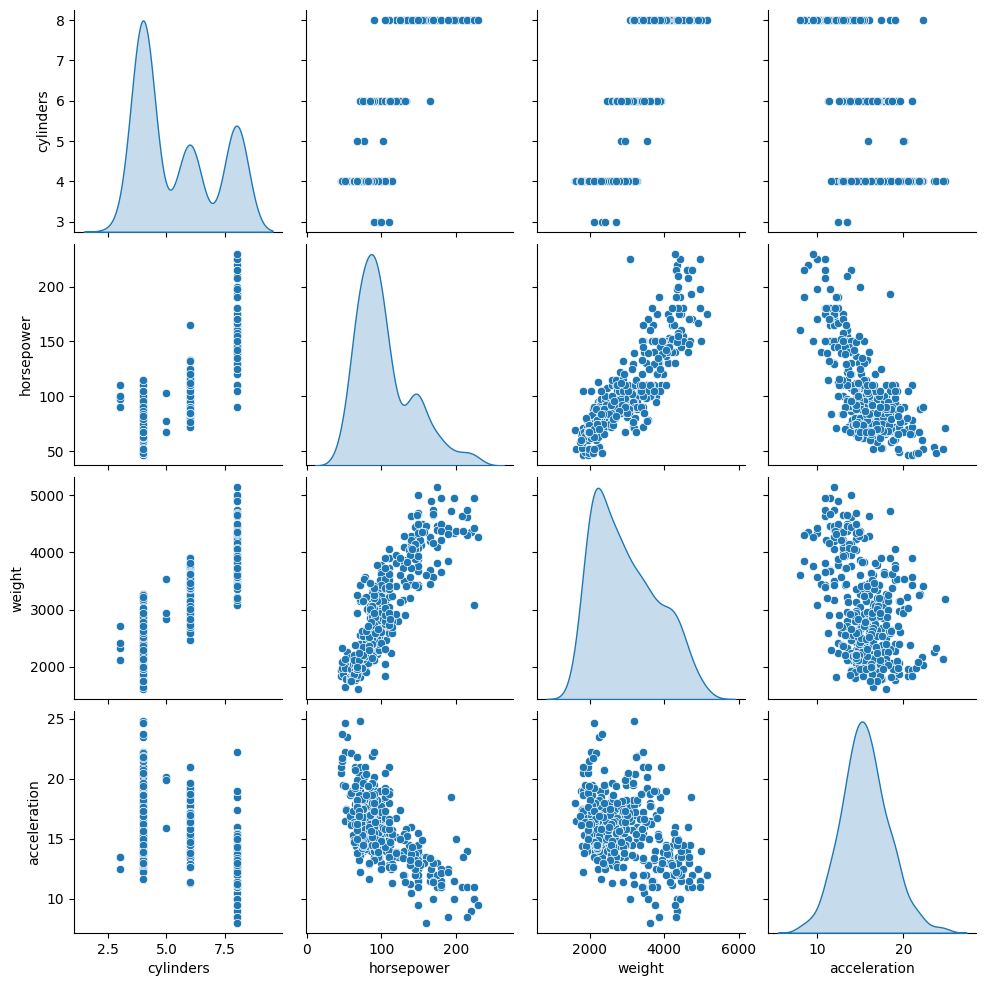

In [8]:
sns.pairplot(df[['cylinders','horsepower','weight','acceleration']],diag_kind='kde')

In [9]:
stats=df.describe()
stats.pop('cylinders')
stats=stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [10]:
x=df.drop('cylinders',axis=1)
y=df.cylinders
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [11]:
def norm(x):
    return (x-stats['mean'])/stats['std']

normalized_train_data=norm(x_train)
normalized_test_data=norm(x_test)

In [12]:

def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation='relu',input_shape=[len(x_train.keys())]),
        layers.Dense(64,activation='relu'),
        layers.Dense(1)
    ])
    optimizer=tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae','mse'])
    return model


In [13]:
model=build_model()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [15]:
pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to c:\users\91979\appdata\local\temp\pip-req-build-wwholxdu
  Resolved https://github.com/tensorflow/docs to commit 7ec3498211be67edf739754575ee4745c05b95ef
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=181791 sha256=bd872f623b6d7306df9eaa3d42b9a6755ba0e379a3d898e3cf59421124fb5e6c
  Stored in directory: C:\Users\91979\AppData\Local\Temp\pip-ephem-wheel-cache-neq5g9by\wheels\3b\ee\a2\ab4d36a9a4af495bcb936f3e849d4b497b65fa40548a68d6c3
Successfully built tensorflow-docs
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs 'C:\Users\91979\AppData\Local\Temp\pip-req-build-wwholxdu'


In [18]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

eps=200

history = model.fit(
    normalized_train_data,y_train,epochs=eps,
    validation_split=0.2,verbose=0,
    callbacks=[tensorflow_docs.modeling.EpochDots(10)])


Epoch: 0, loss:0.1923,  mae:0.3259,  mse:0.1923,  val_loss:0.5120,  val_mae:0.4873,  val_mse:0.5120,  
...

c:\Users\91979\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


.......
Epoch: 10, loss:0.1653,  mae:0.2974,  mse:0.1653,  val_loss:0.4153,  val_mae:0.4493,  val_mse:0.4153,  
..........
Epoch: 20, loss:0.1352,  mae:0.2713,  mse:0.1352,  val_loss:0.3831,  val_mae:0.4324,  val_mse:0.3831,  
..........
Epoch: 30, loss:0.1182,  mae:0.2527,  mse:0.1182,  val_loss:0.3474,  val_mae:0.4123,  val_mse:0.3474,  
..........
Epoch: 40, loss:0.1050,  mae:0.2324,  mse:0.1050,  val_loss:0.3157,  val_mae:0.3822,  val_mse:0.3157,  
..........
Epoch: 50, loss:0.0877,  mae:0.2170,  mse:0.0877,  val_loss:0.2828,  val_mae:0.3684,  val_mse:0.2828,  
..........
Epoch: 60, loss:0.0938,  mae:0.2194,  mse:0.0938,  val_loss:0.3190,  val_mae:0.3916,  val_mse:0.3190,  
..........
Epoch: 70, loss:0.0737,  mae:0.1964,  mse:0.0737,  val_loss:0.3283,  val_mae:0.3996,  val_mse:0.3283,  
..........
Epoch: 80, loss:0.0668,  mae:0.1880,  mse:0.0668,  val_loss:0.4243,  val_mae:0.4969,  val_mse:0.4243,  
..........
Epoch: 90, loss:0.0598,  mae:0.1714,  mse:0.0598,  val_loss:0.2592,  val

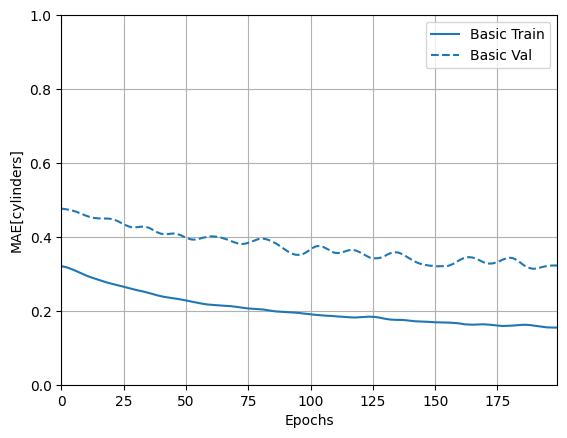

In [24]:
#plot mean absolute error and mean squared  error
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic':history},metric='mae')
plt.ylim([0,1])
plt.ylabel('MAE[cylinders]')
plt.show()

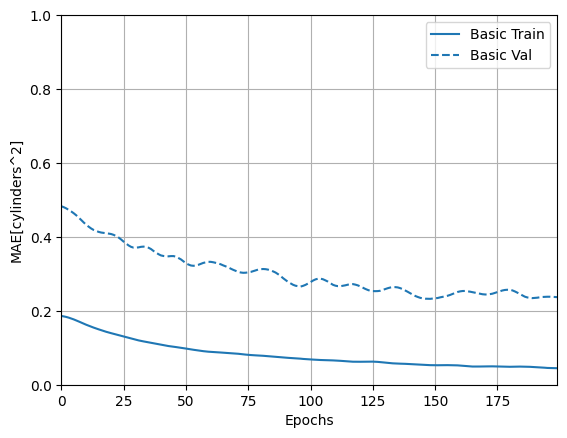

In [26]:

plotter.plot({'Basic':history},metric='mse')
plt.ylim([0,1])
plt.ylabel('MAE[cylinders^2]')
plt.show()

4/4 [==============================] - 0s 1ms/step


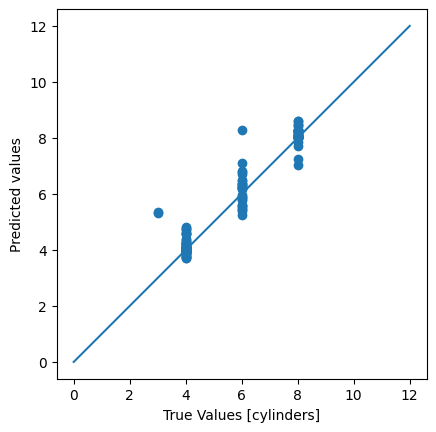

In [29]:
test_predictions = model.predict(normalized_test_data).flatten()

a=plt.axes(aspect='equal')
plt.scatter(y_test,test_predictions)
plt.xlabel('True Values [cylinders]')
plt.ylabel('Predicted values')
lims=[0,12]

_ = plt.plot(lims,lims)